### Intro to Graphs

A graph $G$ is a collection of vertices (or nodes) and edges (connections between the vertices). Graphs can be directed or undirected, weighted or unweighted, and can represent various structures such as social networks, transportation systems, and more.

### Graph Representation

Graphs can be represented in several ways, including:
1. **Adjacency Matrix**: A 2D array where the cell at row $i$ and column $j$ indicates whether there is an edge from vertex $i$ to vertex $j$.
2. **Adjacency List**: A list where each index corresponds to a vertex and contains a list of adjacent vertices.
3. **Edge List**: A list of edges, where each edge is represented as a pair of vertices.


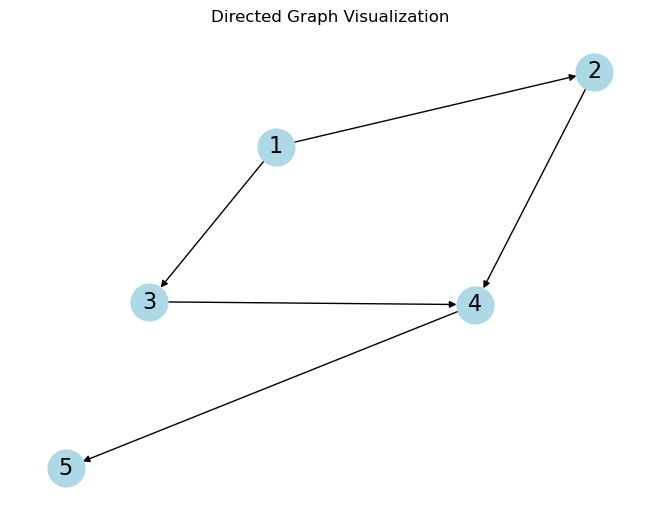

In [1]:
# Let's create a toy (directed) graph and visualize it
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()
# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])
# Add edges
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=16, font_color='black', arrows=True)

# Show the plot
plt.title("Directed Graph Visualization")
plt.show()

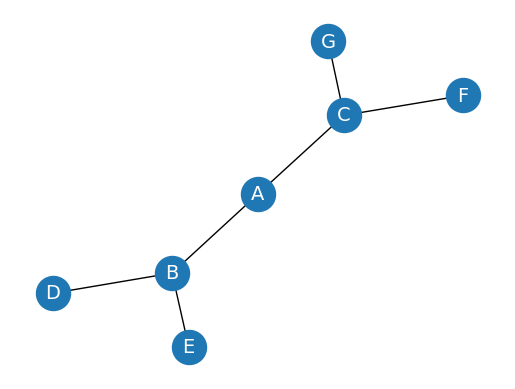

In [2]:
# Let's create a toy (undirected) graph and visualize it

# Create an undirected graph
G = nx.Graph()
# Add nodes
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
# Add edges
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'),
('B', 'E'), ('C', 'F'), ('C', 'G')])

# Draw the undirected graph
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

Let's see how to represent these 2 graphs in a different ways:
1. Adjacency Matrix
2. Adjacency List
3. Edge List

The degree of a node is the number of edges connected to it. In directed graphs, we can distinguish between in-degree (incoming edges) and out-degree (outgoing edges).

A degree matrix is a matrix where each entry $(i, j)$ represents the degree of vertex $i$ in relation to vertex $j$. For undirected graphs, this is symmetric, while for directed graphs, it can be asymmetric.

In [ ]:
# Degree of nodes in the undirected graph

Created graph with 6 nodes and 7 edges

=== GRAPH REPRESENTATIONS ===



C:\Users\dell\AppData\Local\Temp\ipykernel_14824\983258210.py:83: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G).todense()


1. Adjacency Matrix:
[[0 1 1 0 1 0]
 [1 0 0 1 0 0]
 [1 0 0 0 1 0]
 [0 1 0 0 1 0]
 [1 0 1 1 0 1]
 [0 0 0 0 1 0]]

2. Edge List:
  0 -- 1, strength: 0.8
  0 -- 2, strength: 0.6
  0 -- 4, strength: 0.8
  1 -- 3, strength: 0.9
  2 -- 4, strength: 0.5
  3 -- 4, strength: 0.7
  4 -- 5, strength: 0.4

3. Node Features Matrix:
  Node 0 (Alice): [25, 1]
  Node 1 (Bob): [30, 2]
  Node 2 (Carol): [22, 0]
  Node 3 (David): [35, 2]
  Node 4 (Eve): [28, 1]
  Node 5 (Frank): [40, 2]
  Shape: (6, 2)

4. Edge Features:
  Edge (0, 1): [0.8]
  Edge (0, 2): [0.6]
  Edge (0, 4): [0.8]
  Edge (1, 3): [0.9]
  Edge (2, 4): [0.5]
  Edge (3, 4): [0.7]
  Edge (4, 5): [0.4]


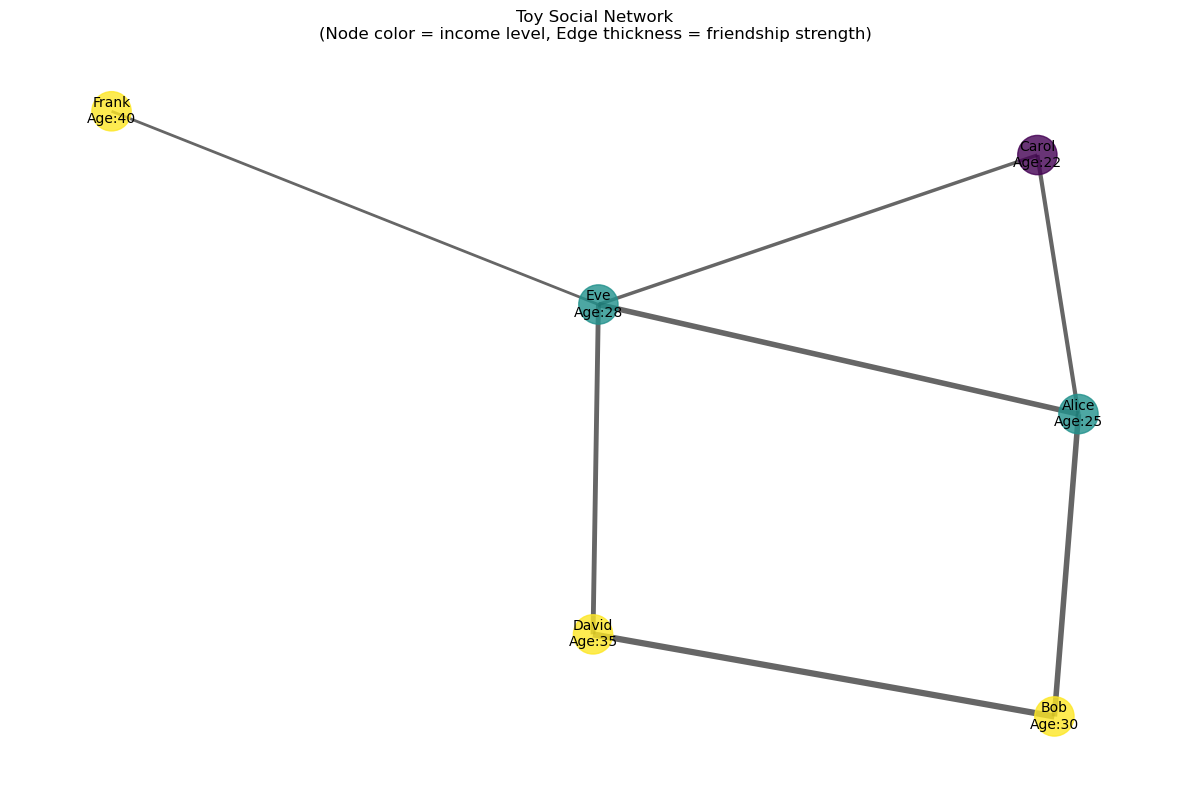


=== GRAPH STATISTICS ===
Number of nodes: 6
Number of edges: 7
Average degree: 2.33

Node degrees:
  Alice (node 0): degree 3
  Bob (node 1): degree 2
  Carol (node 2): degree 2
  David (node 3): degree 2
  Eve (node 4): degree 4
  Frank (node 5): degree 1


In [3]:
# Install required packages first:
# pip install networkx matplotlib numpy torch torch-geometric

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch

# 1. Create a simple graph representing a small social network
def create_toy_social_network():
    """
    Create a small social network with 6 people
    Node features: [age, income_level] 
    Edge features: [friendship_strength]
    """
    G = nx.Graph()
    
    # Add nodes with features
    # Format: (node_id, {feature_dict})
    nodes_data = [
        (0, {"name": "Alice", "age": 25, "income": 1}),    # income: 0=low, 1=med, 2=high
        (1, {"name": "Bob", "age": 30, "income": 2}),
        (2, {"name": "Carol", "age": 22, "income": 0}),
        (3, {"name": "David", "age": 35, "income": 2}),
        (4, {"name": "Eve", "age": 28, "income": 1}),
        (5, {"name": "Frank", "age": 40, "income": 2})
    ]
    
    G.add_nodes_from(nodes_data)
    
    # Add edges with features
    # Format: (node1, node2, {feature_dict})
    edges_data = [
        (0, 1, {"strength": 0.8}),  # Alice-Bob: strong friendship
        (0, 2, {"strength": 0.6}),  # Alice-Carol: medium friendship
        (1, 3, {"strength": 0.9}),  # Bob-David: very strong
        (2, 4, {"strength": 0.5}),  # Carol-Eve: weak
        (3, 4, {"strength": 0.7}),  # David-Eve: strong
        (4, 5, {"strength": 0.4}),  # Eve-Frank: weak
        (0, 4, {"strength": 0.8})   # Alice-Eve: strong
    ]
    
    G.add_edges_from(edges_data)
    return G

# 2. Visualize the graph
def visualize_graph(G):
    plt.figure(figsize=(12, 8))
    
    # Create layout
    pos = nx.spring_layout(G, seed=42)
    
    # Draw nodes
    node_colors = [G.nodes[node]['income'] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, 
                          node_color=node_colors, 
                          cmap=plt.cm.viridis, 
                          node_size=800,
                          alpha=0.8)
    
    # Draw edges with varying thickness based on friendship strength
    edges = G.edges()
    edge_weights = [G[u][v]['strength'] * 5 for u, v in edges]  # Scale for visibility
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.6)
    
    # Add labels
    labels = {node: f"{G.nodes[node]['name']}\nAge:{G.nodes[node]['age']}" 
              for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10)
    
    plt.title("Toy Social Network\n(Node color = income level, Edge thickness = friendship strength)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 3. Convert to different representations
def graph_representations(G):
    """Show different ways to represent the same graph"""
    
    print("=== GRAPH REPRESENTATIONS ===\n")
    
    # Adjacency Matrix
    adj_matrix = nx.adjacency_matrix(G).todense()
    print("1. Adjacency Matrix:")
    print(adj_matrix)
    print()
    
    # Edge List
    print("2. Edge List:")
    for edge in G.edges(data=True):
        print(f"  {edge[0]} -- {edge[1]}, strength: {edge[2]['strength']}")
    print()
    
    # Node Features Matrix
    print("3. Node Features Matrix:")
    node_features = []
    for node in sorted(G.nodes()):
        features = [G.nodes[node]['age'], G.nodes[node]['income']]
        node_features.append(features)
        print(f"  Node {node} ({G.nodes[node]['name']}): {features}")
    
    node_features = np.array(node_features)
    print(f"  Shape: {node_features.shape}")
    print()
    
    # Edge Features
    print("4. Edge Features:")
    edge_features = []
    for edge in G.edges():
        strength = G[edge[0]][edge[1]]['strength']
        edge_features.append([strength])
        print(f"  Edge {edge}: [{strength}]")
    
    return adj_matrix, node_features, edge_features

# 4. Create and analyze our toy graph
if __name__ == "__main__":
    # Create the graph
    G = create_toy_social_network()
    
    print(f"Created graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    print()
    
    # Show different representations
    adj_matrix, node_features, edge_features = graph_representations(G)
    
    # Visualize
    visualize_graph(G)
    
    # Basic graph statistics
    print("\n=== GRAPH STATISTICS ===")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Average degree: {np.mean([G.degree(n) for n in G.nodes()]):.2f}")
    print()
    
    # Node degrees
    print("Node degrees:")
    for node in G.nodes():
        print(f"  {G.nodes[node]['name']} (node {node}): degree {G.degree(node)}")